In [1]:
import pickle
import numpy as np

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
data_path_train = '/content/drive/My Drive/dataset/babi/train_qa.txt'

In [4]:
data_path_test = '/content/drive/My Drive/dataset/babi/test_qa.txt'

In [5]:
with open('/content/drive/My Drive/dataset/babi/train_qa.txt', 'rb') as fp:   # Unpickling
    train_data =  pickle.load(fp)

In [6]:
with open('/content/drive/My Drive/dataset/babi/test_qa.txt', 'rb') as fp:   # Unpickling
    test_data =  pickle.load(fp)

In [7]:
type(train_data)

list

In [8]:
type(test_data)

list

In [9]:
len(test_data)

1000

In [10]:
len(train_data)

10000

In [11]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [12]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [13]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [14]:
train_data[0][2]

'no'

In [18]:
vocab = set()

In [19]:
complete_data = test_data + train_data

In [20]:
for story, ques, ans in complete_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(ques))

In [21]:
vocab.add('no')
vocab.add('yes')

In [22]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [23]:
length_vocab = len(vocab) + 1 

In [24]:
max_story_length = max([len(data[0]) for data in complete_data])

In [25]:
max_story_length

156

In [26]:
max_ques_length = max([len(data[1]) for data in complete_data])

In [27]:
max_ques_length

6

In [28]:
vocab_size = len(vocab) + 1

In [29]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [30]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [31]:
tokenizer.word_index

{'.': 30,
 '?': 10,
 'apple': 7,
 'back': 15,
 'bathroom': 36,
 'bedroom': 29,
 'daniel': 34,
 'discarded': 17,
 'down': 24,
 'dropped': 1,
 'football': 4,
 'garden': 9,
 'got': 21,
 'grabbed': 20,
 'hallway': 8,
 'in': 28,
 'is': 22,
 'john': 27,
 'journeyed': 33,
 'kitchen': 19,
 'left': 2,
 'mary': 11,
 'milk': 16,
 'moved': 31,
 'no': 25,
 'office': 18,
 'picked': 6,
 'put': 23,
 'sandra': 37,
 'the': 26,
 'there': 32,
 'to': 13,
 'took': 5,
 'travelled': 14,
 'up': 35,
 'went': 12,
 'yes': 3}

In [32]:
train_story_text = []
train_ques_text = []
train_ans = []

for story,ques,ans in train_data:
    train_story_text.append(story)
    train_ques_text.append(ques)

In [33]:
train_story_sequence = tokenizer.texts_to_sequences(train_story_text)

In [34]:
len(train_story_text)

10000

In [35]:
len(train_story_sequence)

10000

In [36]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_length=max_story_length,max_ques_length=max_ques_length):

    
    # X = STORIES
    X = []
    # Qs = QUESTION
    Qs = []
    # Y = CORRECT ANSWER
    Y = []
    
    
    for story, ques, ans in data:
        
        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in question
        qs = [word_index[word.lower()] for word in ques]
        
        # Grab the Answers (either Yes/No)
        # Index 0 is reserved so + 1
        y = np.zeros(len(word_index) + 1)
        
        # y == all zeros (Yes/No) , we can use numpy logic to create this assignment
        y[word_index[ans]] = 1
        
        # Append each set of story,question, and answer to their lists
        X.append(x)
        Qs.append(qs)
        Y.append(y)
        
    # Pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
        
    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_length),pad_sequences(Qs, maxlen=max_ques_length), np.array(Y))

In [37]:
inputs_train, ques_train, ans_train = vectorize_stories(train_data)

In [38]:
inputs_test, ques_test, ans_test = vectorize_stories(test_data)

In [39]:
inputs_test

array([[ 0,  0,  0, ..., 26, 29, 30],
       [ 0,  0,  0, ..., 26,  9, 30],
       [ 0,  0,  0, ..., 26,  9, 30],
       ...,
       [ 0,  0,  0, ..., 26,  7, 30],
       [ 0,  0,  0, ..., 26,  9, 30],
       [ 0,  0,  0, ...,  7, 32, 30]], dtype=int32)

In [40]:
ques_test

array([[22, 27, 28, 26, 19, 10],
       [22, 27, 28, 26, 19, 10],
       [22, 27, 28, 26,  9, 10],
       ...,
       [22, 11, 28, 26, 29, 10],
       [22, 37, 28, 26,  9, 10],
       [22, 11, 28, 26,  9, 10]], dtype=int32)

In [41]:
ans_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
sum(ans_test)

array([  0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [43]:
tokenizer.word_index['yes']

3

In [44]:
tokenizer.word_index['no']

25

In [45]:
# Model

In [46]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [47]:
input_sequence = Input((max_story_length,))
question = Input((max_ques_length,))

In [48]:
# Encoders

In [49]:
# Input embedded into a sequence of vectors
input_encoder1 = Sequential()
input_encoder1.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder1.add(Dropout(0.3))

# Output from encoder: (samples, story_max_length, embedding_dim)

In [50]:
# Input embedded into a sequence of vectors (ques_max_length size)
input_encoder2 = Sequential()
input_encoder2.add(Embedding(input_dim=vocab_size,output_dim=max_ques_length))
input_encoder2.add(Dropout(0.3))
# Output from encoder: (samples, story_max_length, ques_max_length)

In [51]:
# Question encoder

In [52]:
# Question embedded into a sequence of vectors
ques_encoder = Sequential()
ques_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_ques_length))
ques_encoder.add(Dropout(0.3))
# Output from encoder: (samples, ques_max_length, embedding_dim)

In [53]:
# Sequence endoer

In [54]:
# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded1 = input_encoder1(input_sequence)
input_encoded2 = input_encoder2(input_sequence)
ques_encoded = ques_encoder(question)

In [55]:
# shape: (samples, story_max_length , ques_max_length)
match = dot([input_encoded1, ques_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [56]:
# add the match matrix with the second input vector sequence
response = add([match, input_encoded2])  # (samples, story_max_length, ques_max_length)
response = Permute((2, 1))(response)  # (samples, ques_max_length, story_max_length)

In [57]:
answer = concatenate([response, ques_encoded])

In [58]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [59]:
# RNN(LSTM) reduce
answer = LSTM(32)(answer)  # (samples, 32)

In [60]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [61]:
answer = Activation('softmax')(answer)

In [62]:
# Final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [64]:
# train
log = model.fit([inputs_train, ques_train], ans_train,batch_size=16,
                    epochs=64,validation_data=([inputs_test, ques_test], ans_test))

Epoch 1/64
625/625 [==============================] - 15s 12ms/step - loss: 0.8007 - accuracy: 0.4953 - val_loss: 0.6936 - val_accuracy: 0.5030
Epoch 2/64
625/625 [==============================] - 7s 11ms/step - loss: 0.6970 - accuracy: 0.5101 - val_loss: 0.6952 - val_accuracy: 0.5030
Epoch 3/64
625/625 [==============================] - 7s 11ms/step - loss: 0.6962 - accuracy: 0.4979 - val_loss: 0.6934 - val_accuracy: 0.4970
Epoch 4/64
625/625 [==============================] - 7s 11ms/step - loss: 0.6951 - accuracy: 0.5019 - val_loss: 0.6936 - val_accuracy: 0.4970
Epoch 5/64
625/625 [==============================] - 7s 11ms/step - loss: 0.6950 - accuracy: 0.4998 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 6/64
625/625 [==============================] - 7s 11ms/step - loss: 0.6955 - accuracy: 0.4937 - val_loss: 0.6940 - val_accuracy: 0.4970
Epoch 7/64
625/625 [==============================] - 7s 11ms/step - loss: 0.6947 - accuracy: 0.4975 - val_loss: 0.6935 - val_accuracy: 0.497

In [65]:
filename = 'QA_YESNO'
model.save(filename)

INFO:tensorflow:Assets written to: QA_YESNO/assets


INFO:tensorflow:Assets written to: QA_YESNO/assets


In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
print(log.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


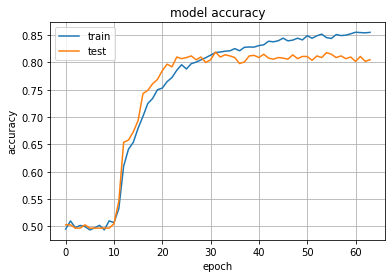

In [67]:
plt.plot(log.history['accuracy'])
plt.plot(log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

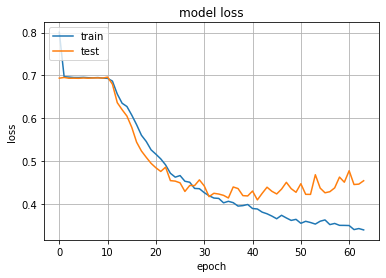

In [68]:
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, ques_test]))

In [70]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [71]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [72]:
ques = ' '.join(word for word in test_data[0][1])
print(ques)

Is John in the kitchen ?


In [73]:
print("True Test Answer:",test_data[0][2])

True Test Answer: no


In [74]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability: ", pred_results[0][val_max])

Predicted answer is:  no
Probability:  0.9983688


In [190]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [224]:
new_story = "John left the bathroom . Sandra dropped the football in the garden ."

In [225]:
new_story.split()

['John',
 'left',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [226]:
new_ques = "Is the football in the garden ?"

In [227]:
new_ques.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [228]:
new_data = [(new_story.split(), new_ques.split(), 'yes')]

In [229]:
new_story,new_ques,new_ans = vectorize_stories(new_data)

In [230]:
pred_results = model.predict(([ new_story, new_ques]))

In [231]:
val_max = np.argmax(pred_results[0])
""
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability:  0.9678238


In [242]:
new_story2 = "Mary picked up the apple . John went in the hallway ." 

In [244]:
new_story2.split()

['Mary',
 'picked',
 'up',
 'the',
 'apple',
 '.',
 'John',
 'went',
 'in',
 'the',
 'hallway',
 '.']

In [245]:
new_ques2 = "Is John in the hallway ?"

In [246]:
new_ques2.split()

['Is', 'John', 'in', 'the', 'hallway', '?']

In [247]:
new_data2 = [(new_story2.split(), new_ques2.split(), 'yes')]

In [248]:
new_story2,new_ques2,new_ans2 = vectorize_stories(new_data2)

In [250]:
pred_results2 = model.predict(([ new_story2, new_ques2]))

In [251]:
val_max = np.argmax(pred_results2[0])
""
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability:  0.9205867
